In [1]:
import sys
sys.path.append('/work/westgroup/ChrisB/_04_thesis/rmg_thesis/RMG-Py/')
print(sys.path)

import os
import shutil
import sys
import itertools

from rmgpy.chemkin import load_chemkin_file
from rmgpy.data.surface import MetalPropertyLibrary, SitePropertyLibrary, MetalPropertyDatabase, SitePropertyDatabase
from rmgpy.data.thermo import ThermoDatabase

['/work/westgroup/ChrisB/_04_thesis/Thesis_repo/rmg_modification', '/work/westgroup/ChrisB/_04_thesis/rmg_thesis/RMG-Py', '/work/westgroup/ChrisB/_04_thesis/Thesis_repo/rmg_modification', '/work/westgroup/ChrisB/miniconda3/envs/rmg_thesis/lib/python37.zip', '/work/westgroup/ChrisB/miniconda3/envs/rmg_thesis/lib/python3.7', '/work/westgroup/ChrisB/miniconda3/envs/rmg_thesis/lib/python3.7/lib-dynload', '', '/home/blais.ch/.local/lib/python3.7/site-packages', '/work/westgroup/ChrisB/miniconda3/envs/rmg_thesis/lib/python3.7/site-packages', '/work/westgroup/ChrisB/miniconda3/envs/rmg_thesis/lib/python3.7/site-packages/chemprop-0.0.1-py3.7.egg', '/work/westgroup/ChrisB/miniconda3/envs/rmg_thesis/lib/python3.7/site-packages/descriptastorus-2.0.0.32-py3.7.egg', '/work/westgroup/ChrisB/miniconda3/envs/rmg_thesis/lib/python3.7/site-packages/IPython/extensions', '/home/blais.ch/.ipython', '/work/westgroup/ChrisB/_04_thesis/rmg_thesis/RMG-Py/']


In [2]:
#load the thermodynamics database
thermoDatabase = ThermoDatabase()
libraries = ['surfaceThermoPt111']
if sys.platform == "darwin":
    thermoDatabase.load(path="/Users/blais.ch/Documents/_01_code/RMG_env_1/RMG-database/input/thermo", libraries = libraries)
else: 
    thermoDatabase.load(path='/work/westgroup/ChrisB/_04_thesis/rmg_thesis/RMG-database/input/thermo', libraries = libraries)
    
thermoDatabase.load_surface()

In [ ]:
# load a species
# test the function. load model each time 


folder = './test_mech/chemkin/'

chemkin_path = os.path.join(folder, 'chem_annotated-gas.inp')
chemkin_surf_path = os.path.join(folder, 'chem_annotated-surface.inp')
dictionary_path = os.path.join(folder, 'species_dictionary.txt')

# load_chemkin_file
species, reactions = load_chemkin_file(chemkin_surf_path, dictionary_path)
# identify a surface species to use for testing
surf_species = species[5]
surf_species.generate_resonance_structures()
display(surf_species)
spec_thermo = surf_species.thermo.to_thermo_data()
surf_species.thermo = spec_thermo

thermo_list = thermoDatabase.get_thermo_data(surf_species)

E_ad_old = (spec_thermo.H298.value_si)/9.68e4

new_thermo = thermoDatabase.correct_binding_energies_extended(spec_thermo, surf_species, metal_to_scale_from='Pt',
                                       metal_to_scale_to='Rh', facet_to_scale_from='111', facet_to_scale_to='211')
print("old E_ad = ", E_ad_old)

In [ ]:
surf_species.molecule[0].to_smiles()

In [4]:
## Make a brand new species
from rmgpy.species import Species


In [ ]:
surf_species = Species().from_smiles('O[*]')
display(surf_species)
surf_species.thermo = thermoDatabase.get_thermo_data(surf_species)[0]
surf_species.generate_resonance_structures()
surf_species.get_thermo_data()
# spec_thermo = surf_species.thermo.to_thermo_data()

# E_ad_old = (spec_thermo.H298.value_si)/9.68e4
# new_thermo = thermoDatabase.correct_binding_energies_extended(spec_thermo, surf_species, metal_to_scale_from='Pt',
#                                        metal_to_scale_to='Rh', facet_to_scale_from='111', facet_to_scale_to='111')
# print("old E_ad = ", E_ad_old)

In [ ]:
surf_species = Species().from_smiles('O[*]')
display(surf_species)
surf_species.thermo = thermoDatabase.get_thermo_data_from_libraries(surf_species)[0]
surf_species.generate_resonance_structures()
spec_thermo = surf_species.thermo.to_thermo_data()

E_ad_old = (spec_thermo.H298.value_si)/9.68e4
new_thermo = thermoDatabase.correct_binding_energy(spec_thermo, surf_species, metal_to_scale_from='Pt',
                                       metal_to_scale_to='Rh')
print("old E_ad = ", E_ad_old)
print("new E_ad = ", new_thermo.H298.value_si/9.68e4)

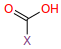

old E_ad =  -4.8744634743055855
new E_ad =  -4.951631813207656


In [8]:
# add the OH exception for carbon 
# add the advanced lsrs option to the input file
# cooj
adj_list = """
1 O u0 p2 c0 {3,S} {4,S}
2 O u0 p2 c0 {3,D}
3 C u0 p0 c0 {1,S} {2,D} {5,S}
4 H u0 p0 c0 {1,S}
5 X u0 p0 c0 {3,S}
"""

surf_species = Species().from_adjacency_list(adj_list)

display(surf_species)
surf_species.thermo = thermoDatabase.get_thermo_data_from_libraries(surf_species)[0]
surf_species.generate_resonance_structures()
spec_thermo = surf_species.thermo.to_thermo_data()

E_ad_old = (spec_thermo.H298.value_si)/9.68e4
new_thermo = thermoDatabase.correct_binding_energy(spec_thermo, surf_species, metal_to_scale_from='Pt',
                                       metal_to_scale_to='Rh')
print("old E_ad = ", E_ad_old)
print("new E_ad = ", new_thermo.H298.value_si/9.68e4)
